# Analysis and Conclusions

In [4]:
import pandas as pd
import numpy as np
import pymysql
from sqlalchemy import create_engine
from getpass import getpass
from sqlalchemy import inspect
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import re
import geopy 

## Madrid split by districts

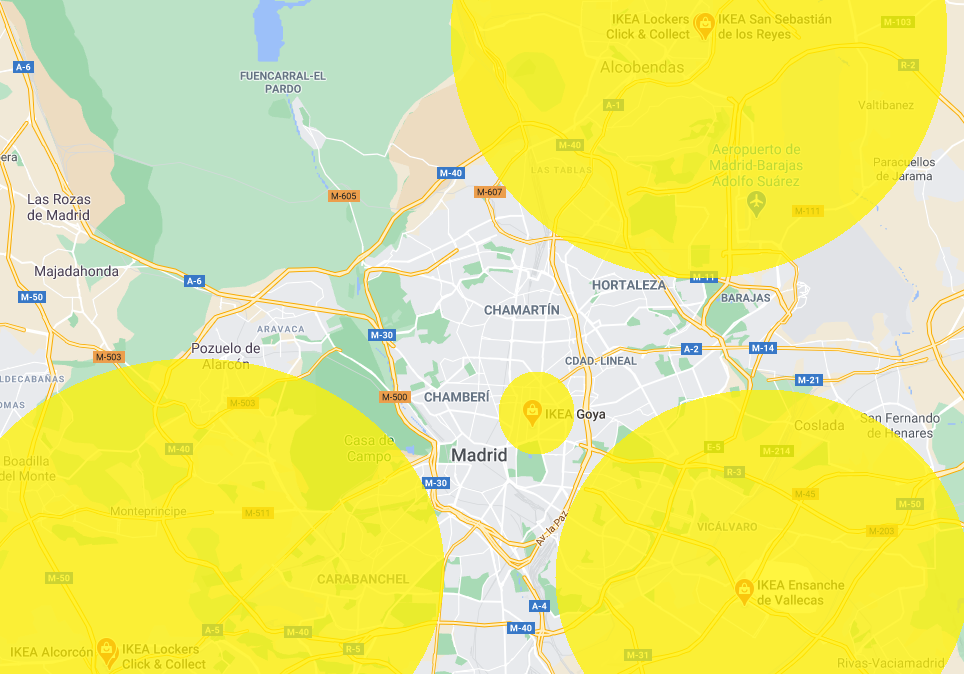

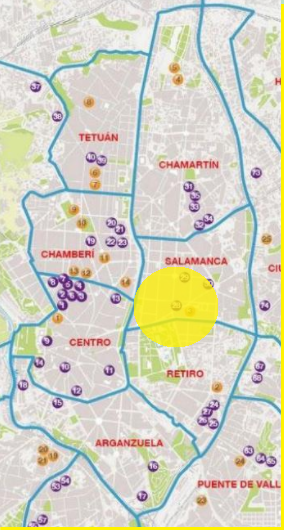

In [5]:
username='root'
password='password'
server='localhost'
database='madrid'
password=getpass()
engine = create_engine(f'mysql+pymysql://{username}:{password}@{server}/{database}')

········


In [275]:
inspector = inspect(engine)
inspector.get_table_names()

['rent', 'sale']

## Focus on Selling Apartments

In [96]:
df = pd.read_sql_query('SELECT * FROM sale', engine)


In [97]:
df

,id,price,date,customer_description,short_detail,address,country,neighborhood,district,address.coordinates.accuracy,...,bathrooms,conservationState,elevator,floor,parking,rooms,surface,terrace,multimedia,price_m2
0,150476642,2200000,2021-02-19 15:40:40.138,"GILMAR Consulting Inmobiliario Madrid, Conde O...",faccion-jardin-terraza-trastero-patio-piscina/...,"Andarrios, Hortaleza",España,Hortaleza,Conde Orgaz - Piovera,0,...,5.0,2.0,NaN,NaN,NaN,5.0,554.0,1.0,[{'url': 'https://d.inmofactory.com/1/100202/1...,3971.0
1,157313689,405000,2021-02-19 15:40:40.138,"Gilmar ofrece, magnifica Vivienda, Ubicada en ...",faccion-parking-ascensor/157313689,Chamartín,España,Chamartín,Prosperidad,0,...,1.0,3.0,1.0,7.0,NaN,3.0,80.0,NaN,[{'url': 'https://my.matterport.com/show/?m=fi...,5062.0
2,153519540,1930000,2021-02-19 15:40:40.138,Gilmar Mirasierra - Puerta de Hierro (91771777...,king-jardin-terraza-trastero-piscina/153519540,Fuencarral,España,Fuencarral,Tres Olivos - Valverde,0,...,6.0,1.0,NaN,NaN,NaN,5.0,547.0,1.0,[{'url': 'https://d.inmofactory.com/1/100207/1...,3528.0
3,154298390,1930000,2021-02-19 15:40:40.138,Gilmar Mirasierra - Puerta de Hierro (91771777...,king-jardin-terraza-trastero-piscina/154298390,Fuencarral,España,Fuencarral,Tres Olivos - Valverde,0,...,6.0,1.0,NaN,NaN,NaN,5.0,547.0,1.0,[{'url': 'https://images.inmofactory.com/inmof...,3528.0
4,158184418,485000,2021-02-19 15:40:40.138,"Magnifica vivienda en Ciudad Jardín, \r\n\r\nP...",faccion-ascensor/158184418,Chamartín,España,Chamartín,Ciudad Jardín,0,...,2.0,4.0,1.0,8.0,NaN,4.0,133.0,NaN,[{'url': 'https://d.inmofactory.com/1/89548/26...,3647.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,158823456,115000,2021-02-05 11:43:44.497,Piso para actualizar en Zona Hellín.\r\n\r\nFa...,faccion/158823456,"Calle de Hinojosa del Duque, San Blas",España,San Blas,Hellín,0,...,1.0,4.0,NaN,6.0,NaN,3.0,62.0,NaN,[{'url': 'https://d.inmofactory.com/1/85276/27...,1855.0
9276,158823310,179000,2021-02-05 11:35:14.360,"Magnífico dúplex loft a dos alturas, totalment...",faccion-parking-terraza-ascensor-amueblado/158...,"Carretera de Vicálvaro a la Estac. O'donnell, ...",España,San Blas,Rosas - Musas,0,...,2.0,NaN,1.0,6.0,NaN,2.0,83.0,1.0,[{'url': 'https://d.inmofactory.com/1/85276/27...,2157.0
9277,158823307,137000,2021-02-05 11:34:53.280,"Luminosa vivienda de 56 m2, amplio salón con c...",faccion-amueblado/158823307,"Calle Garganchón, Barajas",España,Barajas,Aeropuerto,0,...,1.0,3.0,NaN,6.0,NaN,1.0,56.0,NaN,[{'url': 'https://d.inmofactory.com/1/98925/27...,2446.0
9278,158823262,115000,2021-02-05 11:31:41.277,"Fantástico Piso en zona Simancas, Impecable, t...",faccion-no-amueblado/158823262,"Calle de Zubieta, San Blas",España,San Blas,Simancas,0,...,1.0,1.0,NaN,NaN,NaN,2.0,48.0,NaN,[{'url': 'https://d.inmofactory.com/1/85276/27...,2396.0


## Query to get the needed infromation from SQL

In [16]:
overview_query = """select count(id) as Number_of_Appartments, 
neighborhood, round(avg(price),0) as Price, 
round(avg(surface), 0) as Surface, 
round(avg(rooms),0) as rooms from sale
group by neighborhood
order by Number_of_Appartments desc, 
surface desc;"""


In [17]:
overview = pd.read_sql_query(overview_query, engine)

In [23]:
overview['Number_of_Appartments'] = overview['Number_of_Appartments'].astype('int64')

In [24]:
overview['Price'] = overview['Price'].astype('int64')

In [25]:
overview['Surface'] = overview['Surface'].astype('int64')

In [26]:
overview['rooms'] = overview['rooms'].astype('int64')

In [29]:
overview

,Number_of_Appartments,neighborhood,Price,Surface,rooms
0,965,Centro,614476,115,3
1,930,Salamanca,1045729,154,3
2,610,Chamberí,822194,144,3
3,596,Carabanchel,176243,78,3
4,570,Tetuán,418917,107,3
5,502,Chamartín,1063756,184,3
6,485,Puente de Vallecas,139885,71,2
7,460,San Blas,268529,93,3
8,426,Moncloa,1117965,345,4
9,421,Ciudad Lineal,356955,603,3


I've detected strange value in the surface, I will find the outliers and clean them.

## Get rid of the Extreme Values

In [36]:
df = df.set_index(df['id'])

In [43]:
surface.describe().T

count      9257.000000
mean        181.735335
std        3531.296163
min           1.000000
25%          65.000000
50%          90.000000
75%         140.000000
max      267000.000000
Name: surface, dtype: float64

In [45]:
surface.max()

267000.0

In [46]:
surface.min()

1.0

In [55]:
df.shape

(9280, 23)

In [98]:
df.loc[df['surface']<14]

,id,price,date,customer_description,short_detail,address,country,neighborhood,district,address.coordinates.accuracy,...,bathrooms,conservationState,elevator,floor,parking,rooms,surface,terrace,multimedia,price_m2
462,158291676,129000,2021-02-28 04:30:01.497,¿Busca algo en especial ¿Quieres disfrutar de ...,bajadores---lavapies/158291676,Centro,España,Centro,Embajadores - Lavapiés,0,...,1.0,NaN,NaN,1.0,NaN,2.0,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123838/2...,129000.0
977,158977189,142559,2021-02-19 05:11:02.167,Piso en edificio de siete alturas sobre rasant...,uerta-del-angel/158977189,Latina,España,Latina,Puerta del Ángel,0,...,1.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123827/2...,142559.0
1898,158963542,145760,2021-02-18 05:15:31.333,La vivienda tiene una superficie de 97 metros ...,158963542,Carabanchel,España,Carabanchel,San Isidro,0,...,2.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123827/2...,145760.0
2662,158945561,125000,2021-02-17 05:19:46.710,Oportunidad de adquirir este piso muy luminoso...,158945561,Puente de Vallecas,España,Puente de Vallecas,Entrevías,0,...,3.0,NaN,NaN,1.0,NaN,2.0,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123838/2...,125000.0
2673,158945291,98000,2021-02-17 05:07:36.603,¿Busca algo en especial ¿Quieres disfrutar de ...,158945291,Usera,España,Usera,Almendrales,0,...,1.0,NaN,NaN,11.0,NaN,2.0,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123838/2...,98000.0
2680,158945156,135000,2021-02-17 05:03:03.547,¿Busca algo en especial ¿Quieres disfrutar de ...,158945156,Ciudad Lineal,España,Ciudad Lineal,Ventas,0,...,1.0,NaN,NaN,11.0,NaN,3.0,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123838/2...,135000.0
3776,158922362,145000,2021-02-15 11:28:54.230,Piso en venta en Madrid (Madrid) SERVANDO BATA...,ueblo-nuevo/158922362,Ciudad Lineal,España,Ciudad Lineal,Pueblo Nuevo,0,...,NaN,NaN,NaN,14.0,NaN,3.0,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123827/2...,145000.0
3958,158915725,110000,2021-02-15 07:26:23.950,"Piso en venta en Usera, Madrid (Madrid) FERROV...",158915725,Usera,España,Usera,Almendrales,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123827/2...,110000.0
3960,158915709,134000,2021-02-15 07:25:56.950,Piso en venta en Madrid (Madrid) PUERTO ALMANSA.,go/158915709,Puente de Vallecas,España,Puente de Vallecas,San Diego,0,...,NaN,NaN,NaN,14.0,NaN,3.0,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123827/2...,134000.0
3983,158303674,87852,2021-02-15 05:30:22.797,"Tapiado. Vivienda en la planta semisótano, de...",158303674,Carabanchel,España,Carabanchel,San Isidro,0,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123838/2...,87852.0


After analysis I've decided remove the 12 rows where the surface is less than 14m

In [99]:
df.loc[df['surface']<14]

,id,price,date,customer_description,short_detail,address,country,neighborhood,district,address.coordinates.accuracy,...,bathrooms,conservationState,elevator,floor,parking,rooms,surface,terrace,multimedia,price_m2
462,158291676,129000,2021-02-28 04:30:01.497,¿Busca algo en especial ¿Quieres disfrutar de ...,bajadores---lavapies/158291676,Centro,España,Centro,Embajadores - Lavapiés,0,...,1.0,NaN,NaN,1.0,NaN,2.0,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123838/2...,129000.0
977,158977189,142559,2021-02-19 05:11:02.167,Piso en edificio de siete alturas sobre rasant...,uerta-del-angel/158977189,Latina,España,Latina,Puerta del Ángel,0,...,1.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123827/2...,142559.0
1898,158963542,145760,2021-02-18 05:15:31.333,La vivienda tiene una superficie de 97 metros ...,158963542,Carabanchel,España,Carabanchel,San Isidro,0,...,2.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123827/2...,145760.0
2662,158945561,125000,2021-02-17 05:19:46.710,Oportunidad de adquirir este piso muy luminoso...,158945561,Puente de Vallecas,España,Puente de Vallecas,Entrevías,0,...,3.0,NaN,NaN,1.0,NaN,2.0,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123838/2...,125000.0
2673,158945291,98000,2021-02-17 05:07:36.603,¿Busca algo en especial ¿Quieres disfrutar de ...,158945291,Usera,España,Usera,Almendrales,0,...,1.0,NaN,NaN,11.0,NaN,2.0,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123838/2...,98000.0
2680,158945156,135000,2021-02-17 05:03:03.547,¿Busca algo en especial ¿Quieres disfrutar de ...,158945156,Ciudad Lineal,España,Ciudad Lineal,Ventas,0,...,1.0,NaN,NaN,11.0,NaN,3.0,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123838/2...,135000.0
3776,158922362,145000,2021-02-15 11:28:54.230,Piso en venta en Madrid (Madrid) SERVANDO BATA...,ueblo-nuevo/158922362,Ciudad Lineal,España,Ciudad Lineal,Pueblo Nuevo,0,...,NaN,NaN,NaN,14.0,NaN,3.0,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123827/2...,145000.0
3958,158915725,110000,2021-02-15 07:26:23.950,"Piso en venta en Usera, Madrid (Madrid) FERROV...",158915725,Usera,España,Usera,Almendrales,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123827/2...,110000.0
3960,158915709,134000,2021-02-15 07:25:56.950,Piso en venta en Madrid (Madrid) PUERTO ALMANSA.,go/158915709,Puente de Vallecas,España,Puente de Vallecas,San Diego,0,...,NaN,NaN,NaN,14.0,NaN,3.0,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123827/2...,134000.0
3983,158303674,87852,2021-02-15 05:30:22.797,"Tapiado. Vivienda en la planta semisótano, de...",158303674,Carabanchel,España,Carabanchel,San Isidro,0,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,[{'url': 'https://d.inmofactory.com/1/123838/2...,87852.0


## Remove NAM for Surface

In [106]:
wrong_surface = df.loc[df['surface']<14]
df = df.drop(wrong_surface.index, axis=0)

In [107]:
df = df.drop(wrong_surface.index, axis=0)

As surface is a needed filter I've decided to remove surface nam

In [118]:
df = df.dropna(subset=['surface'])

In [127]:
df['surface']

0       554.0
1        80.0
2       547.0
3       547.0
4       133.0
        ...  
9275     62.0
9276     83.0
9277     56.0
9278     48.0
9279     90.0
Name: surface, Length: 9245, dtype: float64

C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='surface'>

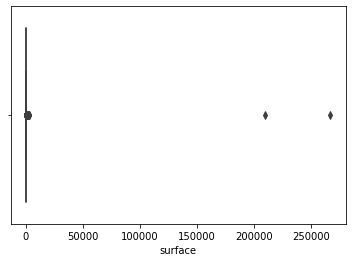

In [142]:
sns.boxplot(df.surface)

In [145]:
summary_surface = df['surface'].describe()

In [146]:
summary_surface

count      9245.000000
mean        181.969389
std        3533.581496
min          14.000000
25%          65.000000
50%          90.000000
75%         140.000000
max      267000.000000
Name: surface, dtype: float64

## OUTLIERS - IQR, BOXPLOT and Z-SCORE

In [147]:
summary_surface['IQR']=summary_surface['75%']-summary_surface['25%']

In [148]:
summary_surface

count      9245.000000
mean        181.969389
std        3533.581496
min          14.000000
25%          65.000000
50%          90.000000
75%         140.000000
max      267000.000000
IQR          75.000000
Name: surface, dtype: float64

In [154]:
summary_surface['cutoff']=summary_surface.IQR*1.6
summary_surface = pd.DataFrame(summary_surface)

AttributeError: 'DataFrame' object has no attribute 'IQR'

In [157]:
summary_surface

,count,mean,std,min,25%,50%,75%,max,IQR,cutoff
surface,9245.0,181.969389,3533.581496,14.0,65.0,90.0,140.0,267000.0,75.0,120.0


In [163]:
summary_surface['lw']=summary_surface['25%']-summary_surface.cutoff
summary_surface['rw']=summary_surface['75%']+summary_surface.cutoff

In [164]:
summary_surface

,count,mean,std,min,25%,50%,75%,max,IQR,cutoff,lw,rw
surface,9245.0,181.969389,3533.581496,14.0,65.0,90.0,140.0,267000.0,75.0,120.0,-55.0,260.0


In [170]:
df.loc[df['surface']>260]

,id,price,date,customer_description,short_detail,address,country,neighborhood,district,address.coordinates.accuracy,...,bathrooms,conservationState,elevator,floor,parking,rooms,surface,terrace,multimedia,price_m2
0,150476642,2200000,2021-02-19 15:40:40.138,"GILMAR Consulting Inmobiliario Madrid, Conde O...",faccion-jardin-terraza-trastero-patio-piscina/...,"Andarrios, Hortaleza",España,Hortaleza,Conde Orgaz - Piovera,0,...,5.0,2.0,NaN,NaN,NaN,5.0,554.0,1.0,[{'url': 'https://d.inmofactory.com/1/100202/1...,3971.0
2,153519540,1930000,2021-02-19 15:40:40.138,Gilmar Mirasierra - Puerta de Hierro (91771777...,king-jardin-terraza-trastero-piscina/153519540,Fuencarral,España,Fuencarral,Tres Olivos - Valverde,0,...,6.0,1.0,NaN,NaN,NaN,5.0,547.0,1.0,[{'url': 'https://d.inmofactory.com/1/100207/1...,3528.0
3,154298390,1930000,2021-02-19 15:40:40.138,Gilmar Mirasierra - Puerta de Hierro (91771777...,king-jardin-terraza-trastero-piscina/154298390,Fuencarral,España,Fuencarral,Tres Olivos - Valverde,0,...,6.0,1.0,NaN,NaN,NaN,5.0,547.0,1.0,[{'url': 'https://images.inmofactory.com/inmof...,3528.0
9,158870851,3100000,2021-02-10 10:45:01.940,"Piso a estrenar en edificio representativo, co...",faccion-ascensor-television/158870851,Salamanca,España,Salamanca,Recoletos,0,...,5.0,1.0,1.0,7.0,NaN,4.0,269.0,NaN,[{'url': 'https://d.inmofactory.com/1/87055/27...,11524.0
30,158651162,2000000,2021-02-19 08:45:42.320,Magnifica vivienda ubicada en el centro de Mad...,faccion-ascensor-parking-no-amueblado/158651162,Centro,España,Centro,Palacio,0,...,4.0,3.0,1.0,7.0,1.0,4.0,393.0,NaN,[{'url': 'https://d.inmofactory.com/1/103494/2...,5089.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,157086355,950000,2021-02-05 12:24:40.663,Engel & Völkers presenta esta parcela con gran...,king-jardin-terraza-piscina-no-amueblado/15708...,Moncloa,España,Moncloa,La Florida - El Plantío,0,...,3.0,4.0,NaN,NaN,NaN,5.0,362.0,1.0,[{'url': 'https://d.inmofactory.com/1/123340/2...,2624.0
9250,157084888,1890000,2021-02-05 12:24:40.603,"Engel & Völkers, inmobiliaria de lujo en Madri...",faccion-parking-terraza-trastero-ascensor-no-a...,Salamanca,España,Salamanca,Castellana,0,...,4.0,4.0,1.0,NaN,NaN,5.0,326.0,1.0,[{'url': 'https://d.inmofactory.com/1/123340/2...,5798.0
9251,158034981,1800000,2021-02-05 12:24:40.603,Engel & Völkers se complace en presentarles es...,faccion-parking-jardin-terraza-trastero-patio-...,"Siro Muela, 24, San Blas",España,San Blas,Salvador,1,...,7.0,2.0,NaN,NaN,NaN,7.0,492.0,1.0,[{'url': 'https://d.inmofactory.com/1/123340/2...,3659.0
9256,157085497,6300000,2021-02-05 12:24:40.400,Magnifica y señorial vivienda de 480 m² en edi...,faccion-parking-terraza-trastero-no-amueblado/...,Salamanca,España,Salamanca,Castellana,0,...,4.0,NaN,NaN,NaN,NaN,5.0,478.0,1.0,[{'url': 'https://d.inmofactory.com/1/123340/2...,13180.0


I can't use IQR since I will remove about 10% of entries (This 10 % brings a lot of money)

Let's try to remove 0.27 % of outliers at the right(high values)

In [203]:
summary_z = pd.DataFrame(df['surface'].describe())

In [204]:
summary_z = (summary_z).T

In [205]:
summary_z['lbound']=summary_z['mean']-3*summary_z['std']
summary_z['rbound']=summary_z['mean']+3*summary_z['std']

In [206]:
summary_z

,count,mean,std,min,25%,50%,75%,max,lbound,rbound
surface,9243.0,130.402142,140.473213,14.0,65.0,90.0,140.0,2700.0,-291.017498,551.821782


In [209]:
outliers = df.loc[df['surface']>10782]

,id,price,date,customer_description,short_detail,address,country,neighborhood,district,address.coordinates.accuracy,...,bathrooms,conservationState,elevator,floor,parking,rooms,surface,terrace,multimedia,price_m2
0,150476642,2200000,2021-02-19 15:40:40.138,"GILMAR Consulting Inmobiliario Madrid, Conde O...",faccion-jardin-terraza-trastero-patio-piscina/...,"Andarrios, Hortaleza",España,Hortaleza,Conde Orgaz - Piovera,0,...,5.0,2.0,NaN,NaN,NaN,5.0,554.0,1.0,[{'url': 'https://d.inmofactory.com/1/100202/1...,3971.0
162,157315441,1900000,2021-02-17 06:19:22.800,"LA FLORIDA, urbanización cerrada de 7 chalets,...",faccion-parking-jardin-terraza-trastero-patio-...,Moncloa,España,Moncloa,La Florida - El Plantío,0,...,8.0,2.0,NaN,NaN,NaN,6.0,630.0,1.0,[{'url': 'https://d.inmofactory.com/1/87055/25...,3016.0
213,157938017,2850000,2021-02-14 06:25:47.487,"Chalet LINDANDO con EL PARDO, impresionantes v...",faccion-parking-jardin-terraza-trastero-patio-...,Moncloa,España,Moncloa,La Florida - El Plantío,0,...,5.0,4.0,NaN,NaN,NaN,5.0,1000.0,1.0,[{'url': 'https://d.inmofactory.com/1/87055/26...,2850.0
266,157310389,2950000,2021-02-10 08:47:27.287,"GILMAR MIRASIERRA, LES PRESENTA ESTE IMPRESION...",faccion-parking-jardin-piscina/157310389,Fuencarral,España,Fuencarral,Mirasierra,0,...,4.0,1.0,NaN,NaN,NaN,4.0,625.0,NaN,[{'url': 'https://d.inmofactory.com/1/100207/2...,4720.0
349,158802943,1375000,2021-02-03 17:36:33.493,chalet pareado en aravaca mejor zona - diploma...,faccion-parking-jardin-terraza-trastero-piscin...,Moncloa,España,Moncloa,Aravaca,0,...,5.0,2.0,NaN,NaN,NaN,6.0,577.0,1.0,[{'url': 'https://d.inmofactory.com/1/84564/27...,2383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8897,129014252,2300000,2021-02-07 10:00:21.393,Recien reformado.\r\nParking para 10 vehículos...,faccion-parking-jardin-patio-piscina-amueblado...,"Valcotos, 13, Moncloa",España,Moncloa,Valdemarín,1,...,9.0,2.0,NaN,3.0,NaN,7.0,1300.0,NaN,[{'url': 'https://d.inmofactory.com/1/99252/76...,1769.0
8924,148722557,7800000,2021-02-07 06:14:04.363,Se vende EN EL ESTADO ACTUAL por 3.000.000€. U...,faccion-parking-jardin-terraza-trastero-patio-...,"Amorebieta, Moncloa",España,Moncloa,La Florida - El Plantío,0,...,9.0,1.0,NaN,NaN,NaN,9.0,2400.0,1.0,[{'url': 'https://d.inmofactory.com/1/87055/61...,3250.0
8977,156247167,2890000,2021-02-06 20:00:21.983,Engel & Völkers Mirasierra – Puerta de Hierro ...,faccion-parking-jardin-terraza-trastero-piscin...,Fuencarral,España,Fuencarral,Mirasierra,0,...,5.0,1.0,NaN,NaN,NaN,5.0,590.0,1.0,[{'url': 'https://d.inmofactory.com/1/89060/22...,4898.0
9213,156123479,1650000,2021-02-05 14:00:23.940,El Viso Inmobiliaria ofrece pareado de 600 m2c...,faccion-parking-jardin-terraza-piscina/156123479,Moncloa,España,Moncloa,Aravaca,0,...,7.0,NaN,NaN,NaN,NaN,6.0,600.0,1.0,[{'url': 'https://d.inmofactory.com/1/112834/2...,2750.0


In [184]:
df = df.drop(outliers.index, axis=0)


In [208]:
df['surface'].describe()

count    9243.000000
mean      130.402142
std       140.473213
min        14.000000
25%        65.000000
50%        90.000000
75%       140.000000
max      2700.000000
Name: surface, dtype: float64

C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='surface'>

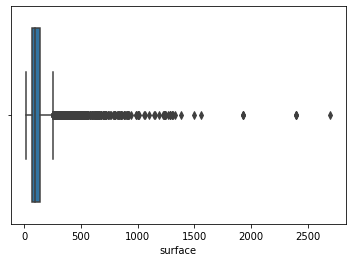

In [198]:
sns.boxplot(df.surface)

In [210]:
df.to_sql('sale', con=engine,index=False,if_exists='replace')

In [211]:
overview_query = """select count(id) as Number_of_Appartments, 
neighborhood, round(avg(price),0) as Price, 
round(avg(surface), 0) as Surface, 
round(avg(rooms),0) as rooms from sale
group by neighborhood
order by Number_of_Appartments desc, 
surface desc;"""


In [212]:
overview = pd.read_sql_query(overview_query, engine)

In [224]:
overview.groupby('neighborhood')


In [227]:
overview

,Number_of_Appartments,neighborhood,Price,Surface,rooms
0,964,Centro,614980.0,115.0,3.0
1,928,Salamanca,1046369.0,154.0,3.0
2,610,Chamberí,822194.0,144.0,3.0
3,590,Carabanchel,176702.0,79.0,3.0
4,570,Tetuán,418917.0,107.0,3.0
5,502,Chamartín,1063756.0,184.0,3.0
6,481,Puente de Vallecas,139109.0,71.0,2.0
7,459,San Blas,269114.0,93.0,3.0
8,424,Moncloa,1111446.0,345.0,4.0
9,415,Ciudad Lineal,359417.0,102.0,3.0


In [251]:
df.loc[df['neighborhood']=='Chamartín']  df.loc[df['surface']>500

,id,price,date,customer_description,short_detail,address,country,neighborhood,district,address.coordinates.accuracy,...,bathrooms,conservationState,elevator,floor,parking,rooms,surface,terrace,multimedia,price_m2
1,157313689,405000,2021-02-19 15:40:40.138,"Gilmar ofrece, magnifica Vivienda, Ubicada en ...",faccion-parking-ascensor/157313689,Chamartín,España,Chamartín,Prosperidad,0,...,1.0,3.0,1.0,7.0,NaN,3.0,80.0,NaN,[{'url': 'https://my.matterport.com/show/?m=fi...,5062.0
4,158184418,485000,2021-02-19 15:40:40.138,"Magnifica vivienda en Ciudad Jardín, \r\n\r\nP...",faccion-ascensor/158184418,Chamartín,España,Chamartín,Ciudad Jardín,0,...,2.0,4.0,1.0,8.0,NaN,4.0,133.0,NaN,[{'url': 'https://d.inmofactory.com/1/89548/26...,3647.0
46,144755439,2500000,2021-02-19 05:45:36.710,"Al llegar a Calanda Homes, lo primero que le s...",bra-nueva/madrid-capital/19175497/144755439,"Avenida de Burgos, 5, Chamartín",España,Chamartín,Castilla,1,...,5.0,NaN,1.0,NaN,1.0,5.0,216.0,1.0,[{'url': 'https://d.fotocasa.es/anuncio/2017/1...,11574.0
153,157456739,1300000,2021-02-17 10:31:59.080,En el distrito de Chamartín concretamente en C...,faccion-parking-jardin-terraza-trastero-ascens...,Chamartín,España,Chamartín,Ciudad Jardín,0,...,3.0,NaN,1.0,7.0,NaN,4.0,210.0,1.0,[{'url': 'https://d.inmofactory.com/1/89548/25...,6190.0
185,158403234,1950000,2021-02-16 10:31:55.077,Magnífica vivienda ubicada en finca de los año...,faccion-parking-terraza-ascensor-internet/1584...,Chamartín,España,Chamartín,El Viso,0,...,5.0,1.0,1.0,8.0,NaN,4.0,251.0,1.0,[{'url': 'https://my.matterport.com/show/?m=et...,7769.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9190,158827309,690000,2021-02-05 16:31:18.743,Inmejorables vistas. Situada en urbanización p...,za-zona-comunitaria-ascensor-piscina/158827309,"Avenida de Pío XII, Chamartín",España,Chamartín,Nueva España,0,...,2.0,1.0,1.0,10.0,NaN,4.0,155.0,1.0,[{'url': 'https://d.inmofactory.com/1/108214/2...,4452.0
9193,156941951,375000,2021-02-05 16:25:15.393,Oportunidad. Precio rebajado. Ideal inversores...,faccion-parking-ascensor/156941951,"Doctor Fleming, Chamartín",España,Chamartín,Hispanoamérica - Bernabéu,0,...,1.0,NaN,1.0,11.0,NaN,1.0,50.0,NaN,[{'url': 'https://d.inmofactory.com/1/112561/2...,7500.0
9238,157085651,2995000,2021-02-05 12:24:41.663,Engel & Völkers ofrece este gran piso en el qu...,faccion-parking-trastero-ascensor-no-amueblado...,Chamartín,España,Chamartín,El Viso,0,...,5.0,NaN,1.0,NaN,NaN,5.0,560.0,NaN,[{'url': 'https://d.inmofactory.com/1/123340/2...,5348.0
9245,157086193,2300000,2021-02-05 12:24:40.863,Engel & Volkers comercializa un fantástico Áti...,faccion-parking-trastero-no-amueblado/157086193,Chamartín,España,Chamartín,El Viso,0,...,4.0,NaN,NaN,NaN,NaN,5.0,367.0,NaN,[{'url': 'https://d.inmofactory.com/1/123340/2...,6267.0


In [257]:
(df[(df.neighborhood=='Chamartín')&(df.surface>500)]).describe()

,id,price,address.coordinates.accuracy,coordinates.latitude,coordinates.longitude,bathrooms,conservationState,elevator,floor,parking,rooms,surface,terrace,price_m2
count,1.800000e+01,1.800000e+01,18.0,18.000000,18.000000,18.000000,13.000000,8.0,9.000000,2.0,18.00000,18.000000,14.0,18.000000
mean,1.557097e+08,4.479167e+06,0.0,40.453551,-3.682929,5.111111,2.461538,1.0,7.000000,1.0,6.00000,651.777778,1.0,6501.222222
std,3.133962e+06,2.526308e+06,0.0,0.010217,0.005866,1.078610,1.330124,0.0,3.082207,0.0,1.53393,144.455389,0.0,2307.926713
min,1.470460e+08,1.700000e+06,0.0,40.438890,-3.691720,3.000000,1.000000,1.0,3.000000,1.0,3.00000,502.000000,1.0,3025.000000
25%,1.556612e+08,2.900000e+06,0.0,40.444817,-3.686079,4.250000,1.000000,1.0,6.000000,1.0,5.00000,560.500000,1.0,5033.250000
50%,1.568117e+08,3.595000e+06,0.0,40.450495,-3.683803,5.000000,3.000000,1.0,7.000000,1.0,6.00000,576.000000,1.0,6480.000000
75%,1.573317e+08,5.587500e+06,0.0,40.464835,-3.679879,6.000000,4.000000,1.0,8.000000,1.0,7.00000,814.500000,1.0,7709.250000
max,1.589279e+08,8.700000e+06,0.0,40.467380,-3.670222,7.000000,4.000000,1.0,13.000000,1.0,9.00000,881.000000,1.0,10235.000000


## Create a new Column with the percentage of apartments by neighborhood

In [ ]:
overview['%n_of_app_distrcitct']  

In [265]:
overview['%n_of_app_distrcitct']  = overview['Number_of_Appartments'].apply(lambda x :(x/overview['Number_of_Appartments'].sum())*100)

In [266]:
overview

,Number_of_Appartments,neighborhood,Price,Surface,rooms,%n_of_app_distrcitct
0,964,Centro,614980.0,115.0,3.0,10.429514
1,928,Salamanca,1046369.0,154.0,3.0,10.040030
2,610,Chamberí,822194.0,144.0,3.0,6.599589
3,590,Carabanchel,176702.0,79.0,3.0,6.383209
4,570,Tetuán,418917.0,107.0,3.0,6.166829
5,502,Chamartín,1063756.0,184.0,3.0,5.431137
6,481,Puente de Vallecas,139109.0,71.0,2.0,5.203938
7,459,San Blas,269114.0,93.0,3.0,4.965920
8,424,Moncloa,1111446.0,345.0,4.0,4.587255
9,415,Ciudad Lineal,359417.0,102.0,3.0,4.489884


In [268]:
overview = overview.drop(21)

In [271]:
overview['%n_of_app_distrcitct'].diff()

0          NaN
1    -0.389484
2    -3.440441
3    -0.216380
4    -0.216380
5    -0.735692
6    -0.227199
7    -0.238018
8    -0.378665
9    -0.097371
10   -0.021638
11   -0.032457
12   -0.216380
13   -0.281294
14   -0.054095
15   -0.108190
16   -0.443579
17   -0.681597
18   -0.270475
19   -0.952072
20   -0.259656
Name: %n_of_app_distrcitct, dtype: float64

In [272]:
df.to_sql('sale', con=engine,index=False,if_exists='replace')

In [274]:
overview.to_csv('overview.csv') 

## Focus in Reting apartments

In [5]:
username='root'
password='password'
server='localhost'
database='madrid'
password=getpass()
engine = create_engine(f'mysql+pymysql://{username}:{password}@{server}/{database}')

········


In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['rent', 'sale']

In [7]:
df_rent = pd.read_sql_query('SELECT * FROM rent', engine)

In [8]:
df_rent

,id,price,date,description,short_detail,address,country,city,neighborhood,district,...,bathrooms,conservationState,elevator,floor,parking,rooms,surface,terrace,multimedia,price_m2
0,157612297,1400,2021-02-19 15:12:29.402,Piso ubicado en corazón del Distrito de Retiro...,/es/alquiler/vivienda/madrid-capital/calefacci...,"Calle de Ibiza, 32, Retiro",España,Madrid,Retiro,Ibiza de Madrid,...,2.0,3.0,1.0,8.0,NaN,3.0,105.0,NaN,[{'url': 'https://d.inmofactory.com/1/86845/22...,13.0
1,156275511,1100,2021-02-19 15:12:29.402,Piso en Urbanización privada con piscina comun...,/es/alquiler/vivienda/madrid-capital/aire-acon...,San Blas,España,Madrid,San Blas,Salvador,...,2.0,NaN,1.0,7.0,1.0,2.0,90.0,NaN,[{'url': 'https://d.inmofactory.com/1/97827/97...,12.0
2,157447223,780,2021-02-19 15:12:29.402,COMISIÓN DE AGENCIA AL 50%\r\nApartamento en G...,/es/alquiler/vivienda/madrid-capital/aire-acon...,"Juan de la Hoz, Salamanca",España,Madrid,Salamanca,Guindalera,...,1.0,NaN,1.0,5.0,NaN,1.0,45.0,1.0,[{'url': 'https://d.inmofactory.com/1/86864/48...,17.0
3,156282920,1700,2021-02-19 15:12:29.402,Fantástica y luminosa vivienda exterior con un...,/es/alquiler/vivienda/madrid-capital/calefacci...,"Calle de Martínez Izquierdo, Salamanca",España,Madrid,Salamanca,Guindalera,...,2.0,2.0,1.0,NaN,1.0,4.0,103.0,1.0,[{'url': 'https://d.inmofactory.com/1/86864/22...,17.0
4,158073481,1500,2021-02-19 15:12:29.402,"Fantástico piso en Avenida 25 de Septiembre, f...",/es/alquiler/vivienda/madrid-capital/calefacci...,San Blas,España,Madrid,San Blas,Salvador,...,2.0,2.0,1.0,11.0,1.0,4.0,138.0,1.0,[{'url': 'https://d.inmofactory.com/1/97827/26...,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,158656257,950,2021-01-29 18:21:01.133,Precioso Ático exterior en Bernabéu-Hispanoamé...,/es/alquiler/vivienda/madrid-capital/aire-acon...,"De Costa Rica, Chamartín",España,Madrid,Chamartín,Nueva España,...,1.0,NaN,1.0,9.0,NaN,1.0,55.0,1.0,[{'url': 'https://d.inmofactory.com/1/107685/2...,17.0
2273,158245390,1250,2021-01-28 00:00:03.013,Tailor & Key presenta piso en alquiler en la z...,/es/alquiler/vivienda/madrid-capital/calefacci...,"Paseo Virgen del Puerto, Arganzuela",España,Madrid,Arganzuela,Imperial,...,2.0,NaN,1.0,6.0,NaN,4.0,117.0,NaN,[{'url': 'https://d.inmofactory.com/1/118430/2...,11.0
2274,156156495,2000,2021-01-27 05:00:02.987,Inmobiliaria Chamberí alquila este amplio piso...,/es/alquiler/vivienda/madrid-capital/calefacci...,"Plaza de San Juan de la Cruz, Chamberí",España,Madrid,Chamberí,Ríos Rosas - Nuevos Ministerios,...,2.0,NaN,1.0,11.0,NaN,3.0,158.0,NaN,[{'url': 'https://d.inmofactory.com/1/86593/22...,13.0
2275,158619379,600,2021-01-26 12:30:21.543,Inmobiliaria chamberi alquila fantastico piso ...,/es/alquiler/vivienda/madrid-capital/aire-acon...,"San Juan de la Cruz, 7, Chamberí",España,Madrid,Chamberí,Ríos Rosas - Nuevos Ministerios,...,1.0,3.0,1.0,14.0,NaN,NaN,39.0,NaN,[{'url': 'https://d.inmofactory.com/1/86593/53...,15.0


In [9]:
overview_rent_query = """select count(id) as Number_of_Appartments, 
neighborhood, round(avg(price),0) as Price, 
round(avg(surface), 0) as Surface, 
round(avg(rooms),0) as rooms from rent
group by neighborhood
order by Number_of_Appartments desc, 
surface desc;"""

In [10]:
overview_rent = pd.read_sql_query(overview_rent_query, engine)

In [11]:
overview_rent['Number_of_Appartments'] = overview_rent['Number_of_Appartments'].astype('int64')

In [12]:
overview_rent['Price'] = overview_rent['Price'].astype('int64')

In [13]:
overview_rent['Surface'] = overview_rent['Surface'].astype('int64')

In [14]:
overview_rent['rooms'] = overview_rent['rooms'].astype('int64')

In [15]:
overview_rent

,Number_of_Appartments,neighborhood,Price,Surface,rooms
0,397,Salamanca,2279,132,3
1,312,Centro,1535,103,2
2,247,Chamberí,1741,115,2
3,214,Chamartín,1958,128,3
4,144,Tetuán,1204,86,2
5,141,Hortaleza,1899,165,3
6,131,Retiro,1636,112,3
7,111,Moncloa,2152,164,3
8,110,Ciudad Lineal,1198,112,2
9,94,Fuencarral,1297,110,3


In [17]:
df_rent = df_rent.set_index(df_rent['id'])

In [18]:
overview_rent = overview_rent.drop(21)

In [19]:
overview_rent

,Number_of_Appartments,neighborhood,Price,Surface,rooms
0,397,Salamanca,2279,132,3
1,312,Centro,1535,103,2
2,247,Chamberí,1741,115,2
3,214,Chamartín,1958,128,3
4,144,Tetuán,1204,86,2
5,141,Hortaleza,1899,165,3
6,131,Retiro,1636,112,3
7,111,Moncloa,2152,164,3
8,110,Ciudad Lineal,1198,112,2
9,94,Fuencarral,1297,110,3


C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

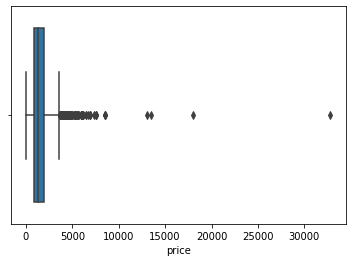

In [21]:
sns.boxplot(df_rent.price)

In [22]:
overview_rent['%n_of_app_distrcitct']  = overview_rent['Number_of_Appartments'].apply(lambda x :(x/overview_rent['Number_of_Appartments'].sum())*100)

In [23]:
overview_rent

,Number_of_Appartments,neighborhood,Price,Surface,rooms,%n_of_app_distrcitct
0,397,Salamanca,2279,132,3,17.465904
1,312,Centro,1535,103,2,13.726353
2,247,Chamberí,1741,115,2,10.866696
3,214,Chamartín,1958,128,3,9.414870
4,144,Tetuán,1204,86,2,6.335240
5,141,Hortaleza,1899,165,3,6.203256
6,131,Retiro,1636,112,3,5.763308
7,111,Moncloa,2152,164,3,4.883414
8,110,Ciudad Lineal,1198,112,2,4.839419
9,94,Fuencarral,1297,110,3,4.135504
